# The use of προσκυνέω (Nestle1904GBI)

## Table of content <a class="anchor" id="TOC"></a>
* <a href="#bullet1">1 - Introduction</a>
    * <a href="#bullet1x1">1.1 - Why is this relevant?</a>
    * <a href="#bullet1x2">1.2 - Translating into Text-Fabric queries</a>
* <a href="#bullet2">2 - Load Text-Fabric app and data</a>
* <a href="#bullet3">3 - Performing the queries</a>
    * <a href="#bullet3x1">3.1 - Determine the renderings of προσκυνέω</a>
    * <a href="#bullet3x2">3.2 - Alternative way of coding</a>
    * <a href="#bullet3x3">3.3 - Using a search template</a>
    * <a href="#bullet3x4">3.4 - What is being 'προσκυνέω-ed'?</a>
    * <a href="#bullet3x5">3.5 - Pie chart showing the renderings</a>
* <a href="#bullet4">4 - Attribution and footnotes</a>
* <a href="#bullet5">5 - Required libraries</a>

# 1 - Introduction <a class="anchor" id="bullet1"></a>
##### [Back to TOC](#TOC)

In this Jupyter NoteBook we will examine the use of lemma προσκυνέω in the Greek New Testament.



## 1.1 - Why is this relevant? <a class="anchor" id="bullet1x1"></a>
##### [Back to TOC](#TOC)

There is an ongoing debate whether προσκυνέω must mean "worship" in a divine sense, especialy when it refers to Jesus or God. The word can refer to homage or respect given to people in authority ([see also entry in Liddel-Scott-Jones Greek-English Lexion](https://stephanus.tlg.uci.edu/lsj/#eid=92238)). So verses that refer to Jesus receiving προσκυνέω may not always prove worship of him as God. The meaning depends on context.

## 1.2 - Translating into Text-Fabric queries <a class="anchor" id="bullet1x2"></a>
##### [Back to TOC](#TOC)

The following examples gather data related to the use of προσκυνέω using various methods and present the results in different ways.

# 2 - Load Text-Fabric app and data <a class="anchor" id="bullet2"></a>
##### [Back to TOC](#TOC)

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
# Loading the Text-Fabric code
# Note: it is assumed Text-Fabric is installed in your environment
from tf.fabric import Fabric
from tf.app import use

In [6]:
# load the N1904 app and data
N1904 = use ("tonyjurg/Nestle1904GBI", version="0.4", hoist=globals())

**Locating corpus resources ...**

In [7]:
# The following will push the Text-Fabric stylesheet to this notebook (to facilitate proper display with notebook viewer)
N1904.dh(N1904.getCss())

# 3 - Performing the queries <a class="anchor" id="bullet3"></a>
##### [Back to TOC](#TOC)

## 3.1 - Determine the renderings of προσκυνέω <a class="anchor" id="bullet3x1"></a>
##### [Back to TOC](#TOC)

This code will produce a list of occurrences of the lemma 'προσκυνέω' along with their accompanying gloss.

In [8]:
# Library to format table
from tabulate import tabulate

# Gather the results
Results=[]
for node in F.lemma.s('προσκυνέω'):
    # Following line creates a nicely formated presentation of the verse
    location="{} {}:{}".format(F.book.v(node),F.chapter.v(node),F.verse.v(node))
    result=(location,F.word.v(node),F.gloss.v(node))
    Results.append(result)
    
# Produce the table
headers = ["location","word","gloss"]
print(tabulate(Results, headers=headers, tablefmt='fancy_grid'))

╒═════════════════════╤══════════════════╤═════════════════════════╕
│ location            │ word             │ gloss                   │
╞═════════════════════╪══════════════════╪═════════════════════════╡
│ Matthew 2:2         │ προσκυνῆσαι      │ to worship              │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 2:8         │ προσκυνήσω       │ may worship             │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 2:11        │ προσεκύνησαν     │ they worshiped          │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 4:9         │ προσκυνήσῃς      │ You will worship        │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 4:10        │ προσκυνήσεις     │ you shall worship       │
├─────────────────────┼──────────────────┼─────────────────────────┤
│ Matthew 8:2         │ προσεκύνει       │ was worshipping         │
├─────────────────────┼───────────

## 3.2 - Alternative way of coding <a class="anchor" id="bullet3x2"></a>
##### [Back to TOC](#TOC)

Note that the the following line of code in previous example:
```
   for node in F.lemma.s('προσκυνέω'):
       {rest of the code}
```

is functionaly equivalent to this three line of code:
```
    for node in F.otype.s('word'):
        lemma=F.lemma.v(node)
        if lemma == 'προσκυνέω':
            {rest of the code}
```

## 3.3 - Using a search template <a class="anchor" id="bullet3x3"></a>
##### [Back to TOC](#TOC)

The same selection can also be made using a search template. Note that the number of results (56) differs from the previous code(59). The reasone is that here the selection is on clause and in the previous code on words. (John 4:23&24 and Revelation 13:4 and 19:10 have duplicate occurances of lemma προσκυνέω).


In [9]:
SearchWorship = '''
book 
  chapter
     verse
       clause
         word lemma=προσκυνέω gloss
'''

# This will create a list containing ordered tuples consisting of node numbers of the items as they appear in the query
WorshipList = N1904.search(SearchWorship)

  0.15s 56 results


The resulting data (stored in WorshipList) can be further processed. For example to print the first 5 occurences in a table:


In [10]:
N1904.table(WorshipList, condensed=True, end=5)

## 3.4 - What is being 'προσκυνέω-ed'? <a class="anchor" id="bullet3x4"></a>
##### [Back to TOC](#TOC)

A more interesting query is to print all occurences of the lemma προσκυνέω while adding the object of προσκυνέω.

This query is using a number of [Locality functions](https://annotation.github.io/text-fabric/tf/cheatsheet.html#l-locality) from the Text-Fabric API. The following diagram shows the concept.

<img src="images/object_of_worship_query.png">

In [13]:
for node in F.lemma.s('προσκυνέω'):
     gloss=F.gloss.v(node)
     # Following line creates a nicely formated presentation of the verse
     location="{} {}:{}".format(F.book.v(node),F.chapter.v(node),F.verse.v(node))
     print('\n',location)
        
     # This finds the parrent clause
     ParrentClause= L.u(node,'clause')[0]
     # Create a list of phrases included in the ParrentClause
     PhraseList=L.d(ParrentClause,'phrase')
     for phrase in PhraseList:
         # check for the phrase containing the object
         object_text=object_gloss=''
         if F.phrasefunction.v(phrase)=='O':
            WordList=L.d(phrase, 'word')
            for word in WordList:
               object_text=object_text+F.word.v(word)+' '
               object_gloss=object_gloss+F.gloss.v(word)+' '
            break
    
     # print the result
     print('\tGreek:',F.word.v(node),' - ',object_text,'\n\tGloss:',F.gloss.v(node),' - ',object_gloss)


 Matthew 2:2
	Greek: προσκυνῆσαι  -  αὐτοῦ τὸν ἀστέρα  
	Gloss: to worship  -  of Him the star 

 Matthew 2:8
	Greek: προσκυνήσω  -  αὐτῷ  
	Gloss: may worship  -  Him 

 Matthew 2:11
	Greek: προσεκύνησαν  -  καὶ  
	Gloss: they worshiped  -  and 

 Matthew 4:9
	Greek: προσκυνήσῃς  -  μοι  
	Gloss: You will worship  -  me 

 Matthew 4:10
	Greek: προσκυνήσεις  -  Κύριον τὸν θεόν σου  
	Gloss: you shall worship  -  [The] Lord the God of you 

 Matthew 8:2
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: was worshipping  -  Him 

 Matthew 9:18
	Greek: προσεκύνει  -  Ταῦτα  
	Gloss: was kneeling down  -  These things 

 Matthew 14:33
	Greek: προσεκύνησαν  -  αὐτῷ  
	Gloss: worshiped  -  Him 

 Matthew 15:25
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: she was worshiping  -  Him 

 Matthew 18:26
	Greek: προσεκύνει  -  αὐτῷ  
	Gloss: was bowing on his knees  -  to him 

 Matthew 20:20
	Greek: προσκυνοῦσα  -  τι  
	Gloss: kneeling down  -  something 

 Matthew 28:9
	Greek: προσεκύνησαν  -  αὐτοῦ τοὺς πόδας καὶ

## 3.5 - Pie chart showing the renderings <a class="anchor" id="bullet3x5"></a>
##### [Back to TOC](#TOC)

The next code generates a pie diagram showing the distribution of renderings of the word προσκυνέω. The grouping is basicly along 'kneeling' and 'worshipping'. When the rendering does not match one of these, it is counted as 'other'. In terms of coding, in this example, we first import the `matplotlib.pyplot` module from library `matplotlib`. Then, we define the data for our pie chart: `labels` and `results`. Additionally, a legend will be included.

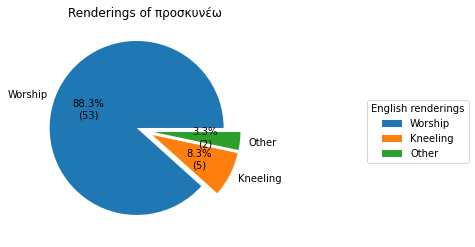

In [15]:
import matplotlib.pyplot as plt

worship=knee=other=0

# This section can also be implemented using a different method (see below) 
for node in F.otype.s('word'):
    lemma=F.lemma.v(node)
    if lemma == 'προσκυνέω':
       gloss=F.gloss.v(node)
       if 'worship' in gloss: 
          worship+=1
       else:
          if 'knee' in gloss: 
             knee+=1
          else:
             other+=1

# Dataset for the plot
labels = ['Worship', 'Kneeling', 'Other']
results = [worship, knee, other]

# create the pie chart with percentage and number of occurances
explode = [0.1,0.1,0.1] # To slice the perticuler section
plt.pie(results, 
        labels=labels, 
        explode = explode,
        autopct=lambda pct: f'{pct:.1f}%\n({int(pct / 100 * sum(results)+0.5)})', 
        # The addition of 0.5 in the lambda function is to prevent rounding errors by the int() function.
        textprops={'color': 'black'})

# add a title to the pie chart
plt.title('Renderings of προσκυνέω')

# Add a legend to the pie chart
plt.legend(title="English renderings",
          loc="center left",
          bbox_to_anchor=(1.5, 0, 1, 1))

# Show plot
plt.show()

Alternatively the first part of this section could be implemented by means of a search function:

In [16]:
# Define the query template
ProskuneoQuery = '''
word lemma=προσκυνέω
'''

# This will create a list containing ordered tuples consisting of node numbers of the items as they appear in the query
ProskuneoResult = N1904.search(ProskuneoQuery)

worship=knee=other=0
for NodeTuple in ProskuneoResult:
    # The query result will be a list of node tuple. Hence we need to add index [0].
    gloss=F.gloss.v(NodeTuple[0])
    if 'worship' in gloss: 
       worship+=1
    else:
        if 'knee' in gloss: 
            knee+=1
        else:
            other+=1

# Print to compare the results
print ('worship=',worship,' knee=',knee,' other=',other)    

  0.09s 60 results
worship= 53  knee= 5  other= 2


# 4 - Attribution and footnotes<a class="anchor" id="bullet4"></a>
##### [Back to TOC](#TOC)

N.A.

# 5 - Required libraries <a class="anchor" id="bullet5"></a>
##### [Back to TOC](#TOC)

The scripts in this notebook require (beside `text-fabric`) the following Python libraries to be installed in the environment:

    tabulate
    matplotlib

You can install any missing library from within Jupyter Notebook using either`pip` or `pip3`.